### Оценка датасета COCO с помощью метрики CLIPScore

In [ ]:
from torchmetrics.multimodal.clip_score import CLIPScore
metric = CLIPScore(model_name_or_path="openai/clip-vit-base-patch16")

In [ ]:
import pandas as pd

In [ ]:
from datasets import load_dataset

dataset = load_dataset("phiyodr/coco2017")

In [ ]:
df_train = pd.DataFrame(dataset['train'])[['coco_url', 'captions']]

In [ ]:
df_train.columns = ['image_url', 'caption_description']
df_train

,image_url,caption_description
0,http://images.cocodataset.org/train2017/000000...,[A man with a red helmet on a small moped on a...
1,http://images.cocodataset.org/train2017/000000...,[A woman wearing a net on her head cutting a c...
2,http://images.cocodataset.org/train2017/000000...,[A child holding a flowered umbrella and petti...
3,http://images.cocodataset.org/train2017/000000...,[A young boy standing in front of a computer k...
4,http://images.cocodataset.org/train2017/000000...,[a boy wearing headphones using one computer i...
...,...,...
118282,http://images.cocodataset.org/train2017/000000...,[A group of friends sitting down at a table sh...
118283,http://images.cocodataset.org/train2017/000000...,"[wine being poured into a glass over a table, ..."
118284,http://images.cocodataset.org/train2017/000000...,"[A man is standing behind a bar with glases, A..."
118285,http://images.cocodataset.org/train2017/000000...,[A group of men sitting at a bar having drinks...


In [ ]:
df_train['caption_description'] = df_train['caption_description'].apply(lambda x: x[0])

In [ ]:
import cv2
import urllib
import numpy as np
import urllib.request
import torchvision.transforms as transforms

def load_img_from_url(image_url):
  try:
    response = urllib.request.urlopen(image_url)
    arr = np.asarray(bytearray(response.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, -1)
    if cv2.waitKey() & 0xff == 27:
      return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    transform = transforms.Compose([
      transforms.ToTensor()
    ])
    tensor = transform(img)
    return tensor
  except:
    return None

In [ ]:
from tqdm import tqdm

In [ ]:
scores = []
df_clip = df_train.iloc[0:20]
for index, row in tqdm(df_clip.iterrows(), total=df_clip.shape[0]):
  image = load_img_from_url(row['image_url'])
  if image is not None:
    scores.append(metric(image, row['caption_description']))

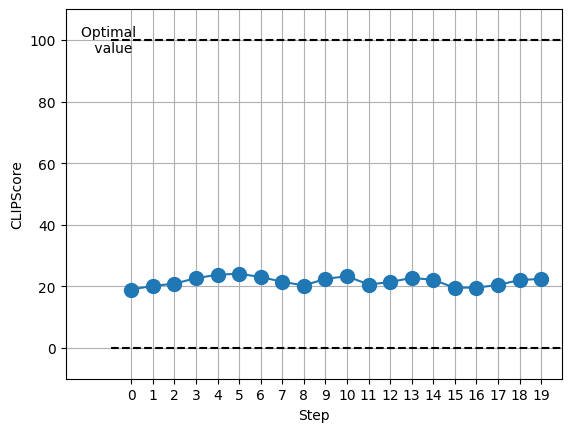

In [ ]:
fig_, ax_ = metric.plot(scores)